## 编码

In [14]:
import pandas as pd
import numpy as np
import matplotlib

import warnings

warnings.filterwarnings('ignore')
data=pd.read_csv("/Users/abcpan/PycharmProjects/datafind/train.csv")


data.difficulty_level[data['difficulty_level']=='easy']=int(1.0)
data.difficulty_level[data['difficulty_level']=='intermediate']=int(2.0)
data.difficulty_level[data['difficulty_level']=='hard']=int(3.0)
data.difficulty_level[data['difficulty_level']=='vary hard']=int(4.0)

data.education[data['education']=='No Qualification']=0.0
data.education[data['education']=='High School Diploma']=1.0
data.education[data['education']=='Matriculation']=2.0
data.education[data['education']=='Bachelors']=3.0
data.education[data['education']=='Masters']=4.0

data['education'].fillna((2.0),inplace=True)

data.gender[data['gender']=='M']=1
data.gender[data['gender']=='F']=0
data.is_handicapped[data['is_handicapped']=='N']=1.0
data.is_handicapped[data['is_handicapped']=='Y']=0.0
data.test_type[data['test_type']=='online']=1.0
data.test_type[data['test_type']=='offline']=0.0



dict_pro_type=dict(data.program_type.value_counts())

# 频率编码

for i in dict_pro_type.keys():
    data.program_type[data['program_type']==i]=dict_pro_type[i]

dict_pro_id=dict(data.program_id.value_counts())

for i in dict_pro_id.keys():
    data.program_id[data['program_id']==i]=dict_pro_id[i]

dict_gender=dict(data.gender.value_counts())
for i in dict_gender.keys():
    data.gender[data['gender']==i]=dict_gender[i]
dict_test_id=dict(data['test_id'].value_counts())
for i in dict_test_id.keys():
    data.test_id[data['test_id']==i]=dict_test_id[i]




# 对于数值处理

In [15]:
del data['age']
c=data

c_one=c.dropna(how='any')
target=c_one['is_pass']
c_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42058 entries, 0 to 49996
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     42058 non-null  object 
 1   program_type               42058 non-null  object 
 2   program_id                 42058 non-null  object 
 3   program_duration           42058 non-null  float64
 4   test_id                    42058 non-null  float64
 5   test_type                  42058 non-null  object 
 6   difficulty_level           42058 non-null  object 
 7   trainee_id                 42058 non-null  float64
 8   gender                     42058 non-null  object 
 9   education                  42058 non-null  float64
 10  city_tier                  42058 non-null  float64
 11  total_programs_enrolled    42058 non-null  float64
 12  is_handicapped             42058 non-null  object 
 13  trainee_engagement_rating  42058 non-null  flo

删除特征

In [16]:
c_one.info()

print(c.head())

print(c_one.info())



del c_one['id_num']

del c_one['is_pass']



<class 'pandas.core.frame.DataFrame'>
Int64Index: 42058 entries, 0 to 49996
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     42058 non-null  object 
 1   program_type               42058 non-null  object 
 2   program_id                 42058 non-null  object 
 3   program_duration           42058 non-null  float64
 4   test_id                    42058 non-null  float64
 5   test_type                  42058 non-null  object 
 6   difficulty_level           42058 non-null  object 
 7   trainee_id                 42058 non-null  float64
 8   gender                     42058 non-null  object 
 9   education                  42058 non-null  float64
 10  city_tier                  42058 non-null  float64
 11  total_programs_enrolled    42058 non-null  float64
 12  is_handicapped             42058 non-null  object 
 13  trainee_engagement_rating  42058 non-null  flo

导入库

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [18]:

print(c_one.info())
d=np.array(c_one)
target=np.array(target)
target.reshape(len(target),1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 42058 entries, 0 to 49996
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   program_type               42058 non-null  object 
 1   program_id                 42058 non-null  object 
 2   program_duration           42058 non-null  float64
 3   test_id                    42058 non-null  float64
 4   test_type                  42058 non-null  object 
 5   difficulty_level           42058 non-null  object 
 6   trainee_id                 42058 non-null  float64
 7   gender                     42058 non-null  object 
 8   education                  42058 non-null  float64
 9   city_tier                  42058 non-null  float64
 10  total_programs_enrolled    42058 non-null  float64
 11  is_handicapped             42058 non-null  object 
 12  trainee_engagement_rating  42058 non-null  float64
dtypes: float64(7), object(6)
memory usage: 4.5+ MB

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

# 分隔数据集

In [19]:
train_x,test_x,train_y,test_y=train_test_split(d,target,train_size=0.9)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score




# 过采样

In [61]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=1)
train_x, train_y = smote_tomek.fit_resample(train_x, train_y)

# 随机森林预测

In [62]:
clt=RandomForestClassifier(1000,oob_score=True,n_jobs=-1,criterion='gini',random_state=1)
clt=clt.fit(train_x,train_y)
# joblib.dump(clt,'/content/drive/MyDrive/QG考核/clfbest.pkl') # 输出模型，用于预测
result=clt.score(test_x,test_y)
print('袋外分数',clt.oob_score_)
pred_y=clt.predict(test_x)
print('score',result)





袋外分数 0.8315544428339263
score 0.7070851165002378


# 决策树

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
ba=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1)
ba.fit(train_x,train_y)
result=ba.score(test_x,test_y)
print(result)
#

0.681169757489301


# 自己写的朴素贝叶斯

In [22]:
# 使用朴素贝叶斯准确率极低分析，在朴素贝叶斯中，我们是通过假设特征相对独立的，但是通过独热编码后，许多特征不是相对独立了
from na_bayes import *
classfication=beyes()
classfication.tarin(train_x,train_y)
classfication.predict(test_x,test_y)


准确率
0.3549690917736567


# 使用xgboost回归

### 相当于重做特征工程，与👆的部分一致，但部分有所改变

#### 因为xgboost中可以将缺失值输入，它会自动处理，所以遇上面不同

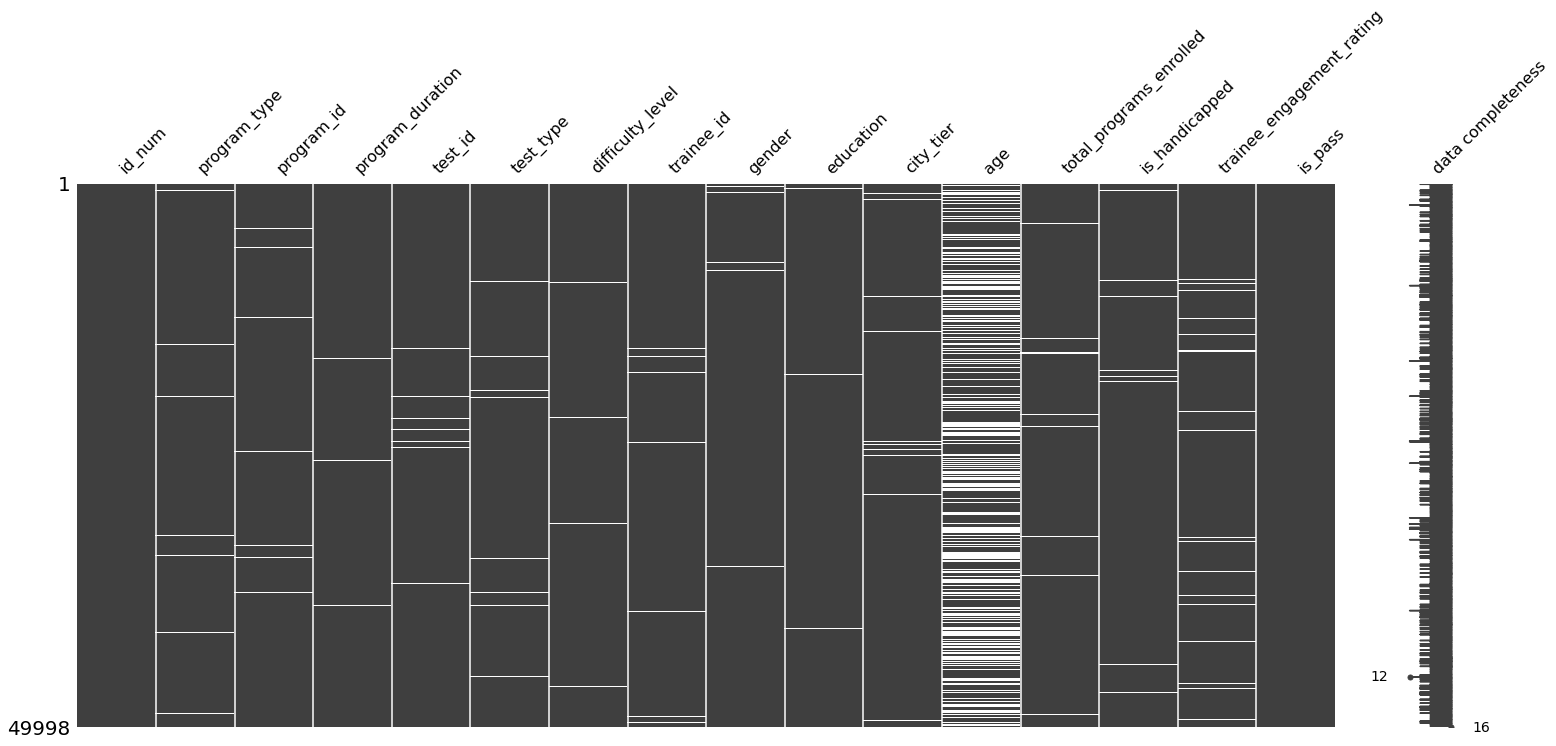

In [44]:
import pandas as pd
import numpy as np
import matplotlib
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv("/content/drive/MyDrive/QG考核/train.csv")
msno.matrix(data, labels=True)
#  标签编码
data.difficulty_level[data['difficulty_level']=='easy']=int(1.0)
data.difficulty_level[data['difficulty_level']=='intermediate']=int(2.0)
data.difficulty_level[data['difficulty_level']=='hard']=int(3.0)
data.difficulty_level[data['difficulty_level']=='vary hard']=int(4.0)
data.education[data['education']=='No Qualification']=0.0
data.education[data['education']=='High School Diploma']=1.0
data.education[data['education']=='Matriculation']=2.0
data.education[data['education']=='Bachelors']=3.0
data.education[data['education']=='Masters']=4.0
data.gender[data['gender']=='M']=1
data.gender[data['gender']=='F']=0
data.is_handicapped[data['is_handicapped']=='N']=1.0
data.is_handicapped[data['is_handicapped']=='Y']=0.0
data.test_type[data['test_type']=='online']=1.0
data.test_type[data['test_type']=='offline']=0.0
# 缺失值填补
data['education'].fillna(data.education.value_counts().idxmax(),inplace=True)
data['difficulty_level'].fillna(data.difficulty_level.value_counts().idxmax(),inplace=True)
data['is_handicapped'].fillna(data.age.value_counts().idxmax(),inplace=True)
data['test_type'].fillna(data.test_type.value_counts().idxmax(),inplace=True)
data['gender'].fillna(data.gender.value_counts().idxmax(),inplace=True)
data["trainee_engagement_rating"].fillna(data.trainee_engagement_rating.value_counts().idxmax(),inplace=True)
data["total_programs_enrolled"].fillna(data.total_programs_enrolled.value_counts().idxmax(),inplace=True)
data['program_duration'].fillna(data['program_duration'].mean(),inplace=True)
# 变量格式转换
data['difficulty_level'].astype(float)
data['is_handicapped'].astype(float)
data['test_type'].astype(float)
data['gender'].astype(float)
data['trainee_engagement_rating'].astype(float)
data['program_duration'].astype(float)
data['total_programs_enrolled'].astype(float)
data['new_feature']=data['city_tier']+data['age']

### 观察一下数据集

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     49998 non-null  object 
 1   program_type               49267 non-null  object 
 2   program_id                 49299 non-null  object 
 3   program_duration           49998 non-null  float64
 4   test_id                    49273 non-null  float64
 5   test_type                  49998 non-null  float64
 6   difficulty_level           49998 non-null  int64  
 7   trainee_id                 49259 non-null  float64
 8   gender                     49998 non-null  int64  
 9   education                  49998 non-null  float64
 10  city_tier                  49298 non-null  float64
 11  age                        30619 non-null  float64
 12  total_programs_enrolled    49998 non-null  float64
 13  is_handicapped             49998 non-null  flo

### 尝试拟合age,效果很差

In [46]:
# feature_ageno=data[data['age'].isna()]
# feature_age=data.dropna(how='any',subset=['age'])
# # print(len(feature_age))
# # print(feature_age.info())
# # print(feature_ageno.info())
# feature_age.dropna(how='any',inplace=True)
# train_y=feature_age['age']
# del feature_ageno['age']
# del feature_age['age']
# ageno_num=feature_ageno['id_num']
# # del feature_age['is_pass']
# # del feature_ageno['is_pass']
# age_num= feature_age['id_num']
# del feature_ageno['id_num']
# feature_ageno.dropna(how='any',inplace=True)
# from sklearn.model_selection import train_test_split
# del feature_age['id_num']

# # del feature_ageno['age']
# # del feature_age['age']
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.tree import DecisionTreeRegressor
# # from xgboost import GradientBoostingRegressor
# age_model=AdaBoostRegressor(RandomForestRegressor(n_estimators=50,n_jobs=-1),
#                           n_estimators=100)
# ageno=np.array(feature_ageno)
# agetrain=np.array(feature_age)
# age_y=np.array(train_y)
# age_x_train,age_x_test,age_y_train,age_y_test=train_test_split(agetrain,age_y,train_size=0.8)
# age_model.fit(age_x_train,age_y_train)
# y_prob=age_model.predict(ageno)
# # age_y_prob=age_model.predict(age_x_test)
# print(age_model.score(age_x_test,age_y_test))
# y_prob
# feature_age['age']=train_y
# feature_ageno['id_num']=ageno_num
# feature_age['id_num']=age_num
# feature_ageno['age']=y_prob
# data=pd.concat([feature_age,feature_ageno],ignore_index=True)
# print(data.info())

### 独热编码

In [47]:
data=pd.get_dummies(data,columns=['gender'])

### 导入待预测数据，并进行编码

In [48]:
test1=pd.read_csv('/Users/abcpan/PycharmProjects/datafind/test2.csv')
data.info()
data.education=data.education.astype(float)
data.info()
# 标签编码
test1.difficulty_level[test1['difficulty_level']=='easy']=int(1.0)
test1.difficulty_level[test1['difficulty_level']=='intermediate']=int(2.0)
test1.difficulty_level[test1['difficulty_level']=='hard']=int(3.0)
test1.difficulty_level[test1['difficulty_level']=='vary hard']=int(4.0)
test1.education[test1['education']=='No Qualification']=0.0
test1.education[test1['education']=='High School Diploma']=1.0
test1.education[test1['education']=='Matriculation']=2.0
test1.education[test1['education']=='Bachelors']=3.0
test1.education[test1['education']=='Masters']=4.0
test1.gender[test1['gender']=='M']=1
test1.gender[test1['gender']=='F']=0
test1.is_handicapped[test1['is_handicapped']=='N']=1.0
test1.is_handicapped[test1['is_handicapped']=='Y']=0.0
test1.test_type[test1['test_type']=='online']=1.0
test1.test_type[test1['test_type']=='offline']=0.0

# 填补缺失值
test1['education'].fillna(test1.education.value_counts().idxmax(),inplace=True)
test1['difficulty_level'].fillna(test1.difficulty_level.value_counts().idxmax(),inplace=True)
test1['is_handicapped'].fillna(test1.age.value_counts().idxmax(),inplace=True)
test1['test_type'].fillna(test1.test_type.value_counts().idxmax(),inplace=True)
test1['gender'].fillna(test1.gender.value_counts().idxmax(),inplace=True)
test1["trainee_engagement_rating"].fillna(test1.trainee_engagement_rating.value_counts().idxmax(),inplace=True)
test1["total_programs_enrolled"].fillna(test1.total_programs_enrolled.value_counts().idxmax(),inplace=True)
test1['program_duration'].fillna(test1['program_duration'].mean(),inplace=True)

# 类型转化
test1['is_handicapped'].astype(float)
test1['difficulty_level'].astype(float)
test1['test_type'].astype(float)
test1['gender'].astype(float)
test1['trainee_engagement_rating'].astype(float)
test1['program_duration'].astype(float)
test1['total_programs_enrolled'].astype(float)

# 构造新特征
test1['new_feature']=test1['city_tier']+test1['age']
test1.education.astype(float)
print(test1.education)
test1.education=test1.education.astype(float)
print(test1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     49998 non-null  object 
 1   program_type               49267 non-null  object 
 2   program_id                 49299 non-null  object 
 3   program_duration           49998 non-null  float64
 4   test_id                    49273 non-null  float64
 5   test_type                  49998 non-null  float64
 6   difficulty_level           49998 non-null  int64  
 7   trainee_id                 49259 non-null  float64
 8   education                  49998 non-null  float64
 9   city_tier                  49298 non-null  float64
 10  age                        30619 non-null  float64
 11  total_programs_enrolled    49998 non-null  float64
 12  is_handicapped             49998 non-null  float64
 13  trainee_engagement_rating  49998 non-null  flo

### 看看填补是否完成，

In [49]:
test1=pd.get_dummies(test1,columns=['gender'])
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11465 entries, 0 to 11464
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     11465 non-null  object 
 1   program_type               11465 non-null  object 
 2   program_id                 11465 non-null  object 
 3   program_duration           11465 non-null  int64  
 4   test_id                    11465 non-null  int64  
 5   test_type                  11465 non-null  float64
 6   difficulty_level           11465 non-null  int64  
 7   trainee_id                 11465 non-null  int64  
 8   education                  11465 non-null  float64
 9   city_tier                  11465 non-null  int64  
 10  age                        7068 non-null   float64
 11  total_programs_enrolled    11465 non-null  int64  
 12  is_handicapped             11465 non-null  float64
 13  trainee_engagement_rating  11465 non-null  flo

### 删除不好编码的特征，分隔数据集




In [50]:

import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

target=data.is_pass
testid=test1.id_num
# 删除特征
for i in ['id_num','program_type', 'program_id' ]:    
  del data[i]
  del test1[i]

del test1['is_pass']
del data['is_pass']
# 分隔数据
data,test_data,target,test_traget=train_test_split(data,target,train_size=0.8)



### 训练模型

流式输出内容被截断，只能显示最后 5000 行内容。
[5025]	train-auc:0.838164	test-auc:0.754684
[5026]	train-auc:0.838177	test-auc:0.754687
[5027]	train-auc:0.838184	test-auc:0.75469
[5028]	train-auc:0.838193	test-auc:0.754695
[5029]	train-auc:0.838204	test-auc:0.754699
[5030]	train-auc:0.838213	test-auc:0.754698
[5031]	train-auc:0.838222	test-auc:0.754704
[5032]	train-auc:0.83823	test-auc:0.754702
[5033]	train-auc:0.83825	test-auc:0.754706
[5034]	train-auc:0.838261	test-auc:0.754711
[5035]	train-auc:0.83827	test-auc:0.754704
[5036]	train-auc:0.838279	test-auc:0.754713
[5037]	train-auc:0.83829	test-auc:0.754717
[5038]	train-auc:0.838304	test-auc:0.75472
[5039]	train-auc:0.838315	test-auc:0.754732
[5040]	train-auc:0.838314	test-auc:0.754732
[5041]	train-auc:0.838325	test-auc:0.754737
[5042]	train-auc:0.838331	test-auc:0.754743
[5043]	train-auc:0.838346	test-auc:0.754758
[5044]	train-auc:0.83836	test-auc:0.754765
[5045]	train-auc:0.838367	test-auc:0.754769
[5046]	train-auc:0.838379	test-auc:0.754776
[5047]	train

findfont: Font family ['feature important'] not found. Falling back to DejaVu Sans.
findfont: Font family ['feature important'] not found. Falling back to DejaVu Sans.


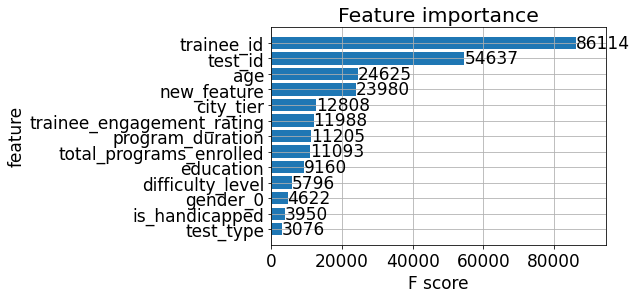

In [51]:



# xgboost模型初始化设置
dtrain=xgb.DMatrix(data,label=target)  #将pandas格式的训练数据输入成xgb独有的格式
testd=xgb.DMatrix(test_data,label=test_traget)
dtest=xgb.DMatrix(test1)
watchlist = [(dtrain,'train'),(testd,'test')]
eval_re={}
# booster:
params={'booster':'gbtree', # 基学习器
        'objective': 'binary:logistic', # 给定输出目标为概率，可以通过阈值来达成不同准确率，最后0.5较好
        'eval_metric': 'auc',  # 选取auc为监视的标准
        'max_depth':5,  # 基学习器的最大深度
        'lambda':10,   # 正则化参数
        'subsample':0.75,  # 使用到的样本占全样本比例，过大会overfitting
        'min_child_weight':2,  
        'nthread':8,   # 选取8个核心来运行程序
        'learning_rate' : 0.01  # 学习率
        }

# 建模与预测：10000棵树
bst=xgb.train(params,dtrain,num_boost_round=10000,evals=watchlist,evals_result=eval_re)
ypred=bst.predict(dtest)
 
# 设置阈值、评价指标
y_pred = (ypred >= 0.5)*1

ypred = bst.predict(dtest)
print("测试集每个样本的得分\n",ypred)
ypred_leaf = bst.predict(dtest, pred_leaf=True)
print("测试集每棵树所属的节点数\n",ypred_leaf)
ypred_contribs = bst.predict(dtest, pred_contribs=True)
print("特征的重要性\n",ypred_contribs )
print("*"*100)
# print('验证集结果',eval_re)
xgb.plot_importance(bst,height=0.8, ylabel='feature')
plt.rc('font', family='feature important', size=17)
plt.show()

In [52]:
print('验证集结果',eval_re)

验证集结果 {'train': {'auc': [0.681938, 0.685357, 0.691092, 0.692069, 0.692171, 0.693916, 0.6939, 0.693763, 0.693875, 0.694731, 0.694747, 0.695417, 0.695086, 0.695549, 0.695949, 0.695733, 0.695563, 0.695224, 0.69562, 0.696202, 0.69662, 0.696667, 0.696823, 0.696871, 0.696985, 0.697142, 0.697302, 0.69758, 0.697591, 0.697923, 0.698015, 0.698036, 0.69808, 0.698225, 0.698538, 0.698537, 0.698989, 0.699096, 0.699086, 0.69909, 0.699458, 0.699585, 0.699509, 0.699579, 0.699761, 0.700155, 0.700228, 0.700552, 0.700586, 0.700627, 0.700673, 0.700855, 0.70089, 0.700945, 0.701016, 0.701145, 0.701268, 0.701305, 0.701281, 0.701318, 0.701563, 0.701542, 0.701707, 0.701921, 0.702247, 0.702474, 0.702711, 0.70284, 0.703023, 0.703144, 0.703393, 0.703541, 0.703698, 0.703828, 0.703963, 0.704098, 0.704075, 0.704142, 0.704386, 0.704492, 0.704592, 0.704949, 0.705148, 0.705307, 0.705565, 0.705891, 0.706005, 0.706079, 0.706269, 0.706417, 0.706464, 0.706621, 0.706727, 0.706871, 0.707041, 0.707227, 0.707511, 0.707646, 0.70

### 输出结果，阈值设定为0.5

In [53]:
result=pd.DataFrame(testid)

result['is_pass']=ypred
result.is_pass[result['is_pass']>0.5]=1
result.is_pass=result.is_pass.astype(int)
print(result)

          id_num  is_pass
0        4753_31        1
1      10816_148        1
2       7498_114        1
3      14139_175        1
4       11305_25        0
...          ...      ...
11460   1612_108        1
11461   17726_44        1
11462   8272_131        1
11463  10621_166        1
11464    2465_48        1

[11465 rows x 2 columns]


### 输出csv

In [54]:
result.to_csv('answer3.csv',index=False)